# Aero Sym HW 2

In [1]:
from Pyfiles import PyFiles
import math
import matplotlib.pyplot as plt

In [2]:
pyFi = PyFiles()

In [3]:
#p1
ss2 = 'math.sqrt(1 + (1/math.cos(x)**4))'
I2 = pyFi.guass_quad(ss2,0,2,2)
II2 = pyFi.guass_quad(ss2,0,2,3)
print I2, II2


23282.528780589008 17.552434926424443


In [4]:
#p2
ss = 'math.exp(-x**2)'
error = []
for a in [4,8,16,32,64,128]:
    I = pyFi.trapezoidal(ss,0,2,a)
    I = I*(2/math.sqrt(math.pi))
    error.append(math.log(abs(I - pyFi.erf2())))
    print "iteration: " + str(a) + "\t Integral: " + str(I)

iteration: 4	 Integral: 0.993671720902
iteration: 8	 Integral: 0.994896189688
iteration: 16	 Integral: 0.995214904823
iteration: 32	 Integral: 0.995295372402
iteration: 64	 Integral: 0.99531553858
iteration: 128	 Integral: 0.995320583204


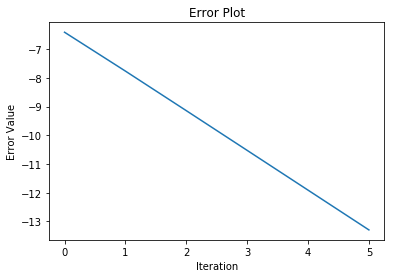

In [5]:
plt.plot(error)
plt.ylabel('Error Value')
plt.xlabel('Iteration')
plt.title('Error Plot')
plt.show()

This plot shows that the more iterations we do in an integral the less error there is between it and the actual answer. 

#p3
Logorithmic interpolations

#p4 The Mathematical definition of Curvature is any of a number of loosely related concepts in different areas of geometry. Intuitively, curvature is the amount by which a geometric object such as a surface deviates from being a flat plane, or a curve from being straight as in the case of a line, but this is defined in different ways depending on the context. 

In [6]:
#p5 - 8.15
x = [-2, -1, 0, 1, 2, 3, 4]
y = [-14, 0.5, 3.1, 0, -3, 0, 16]
xi = [i/100.0 for i in range(-200, 401, 1)]
cia = pyFi.lagrange_coef(x,y)
yia = pyFi.lagrange_eval(xi,x,cia)

In [7]:
print cia

[-1, -0.004166666666666667, 0.06458333333333334, 0, -1, 0, 0]


In [8]:
from scipy.interpolate import interp1d
myint =  interp1d(x, y,3)
myint(xi)

array([-1.40000000e+01, -1.37754265e+01, -1.35526662e+01, -1.33317128e+01,
       -1.31125600e+01, -1.28952015e+01, -1.26796309e+01, -1.24658420e+01,
       -1.22538286e+01, -1.20435842e+01, -1.18351027e+01, -1.16283777e+01,
       -1.14234029e+01, -1.12201720e+01, -1.10186787e+01, -1.08189169e+01,
       -1.06208800e+01, -1.04245619e+01, -1.02299563e+01, -1.00370568e+01,
       -9.84585714e+00, -9.65635109e+00, -9.46853232e+00, -9.28239453e+00,
       -9.09793143e+00, -8.91513672e+00, -8.73400411e+00, -8.55452730e+00,
       -8.37670000e+00, -8.20051592e+00, -8.02596875e+00, -7.85305221e+00,
       -7.68176000e+00, -7.51208583e+00, -7.34402339e+00, -7.17756641e+00,
       -7.01270857e+00, -6.84944359e+00, -6.68776518e+00, -6.52766703e+00,
       -6.36914286e+00, -6.21218636e+00, -6.05679125e+00, -5.90295123e+00,
       -5.75066000e+00, -5.59991127e+00, -5.45069875e+00, -5.30301614e+00,
       -5.15685714e+00, -5.01221547e+00, -4.86908482e+00, -4.72745891e+00,
       -4.58733143e+00, -